In [1]:
import pandas as pd
import numpy as np
# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
# Store our passenger ID for easy access
PassengerId = titanic_test['PassengerId']

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_test.shape

(418, 11)

In [6]:
titanic = pd.concat([titanic_train,titanic_test],keys=('train','test'))

In [7]:
titanic

Age Cabin Embarked      Fare  \
train 0    22.0   NaN        S    7.2500   
      1    38.0   C85        C   71.2833   
      2    26.0   NaN        S    7.9250   
      3    35.0  C123        S   53.1000   
      4    35.0   NaN        S    8.0500   
...         ...   ...      ...       ...   
test  413   NaN   NaN        S    8.0500   
      414  39.0  C105        C  108.9000   
      415  38.5   NaN        S    7.2500   
      416   NaN   NaN        S    8.0500   
      417   NaN   NaN        C   22.3583   

                                                        Name  Parch  \
train 0                              Braund, Mr. Owen Harris      0   
      1    Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
      2                               Heikkinen, Miss. Laina      0   
      3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
      4                             Allen, Mr. William Henry      0   
...                                                      ...    ...   
test  413                                 Spector, Mr. Woolf      0   
      414                       Oliva y Ocana, Dona. Fermina      0   
      415                       Saether, Mr. Simon Sivertsen      0   
      416                                Ware, Mr. Frederick      0   
      417                           Peter, Master. Michael J      1   

           PassengerId  Pclass     Sex  SibSp  Survived              Ticket  
train 0              1       3    male      1       0.0           A/5 21171  
      1              2       1  female      1       1.0            PC 17599  
      2              3       3  female      0       1.0    STON/O2. 3101282  
      3              4       1  female      1       1.0              113803  
      4              5       3    male      0       0.0              373450  
...                ...     ...     ...    ...       ...                 ...  
test  413         1305       3    male      0       NaN           A.5. 3236  
      414         1306       1  female      0       NaN            PC 17758  
      415         1307       3    male      0       NaN  SOTON/O.Q. 3101262  
      416         1308       3    male      0       NaN              359309  
      417         1309       3    male      1       NaN                2668  

[1309 rows x 12 columns]

In [8]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 0) to (test, 417)
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 108.0+ KB


In [10]:
pd.set_option('display.float_format', '{:.2f}'.format) # to change the format from 0.0000 to 0.00

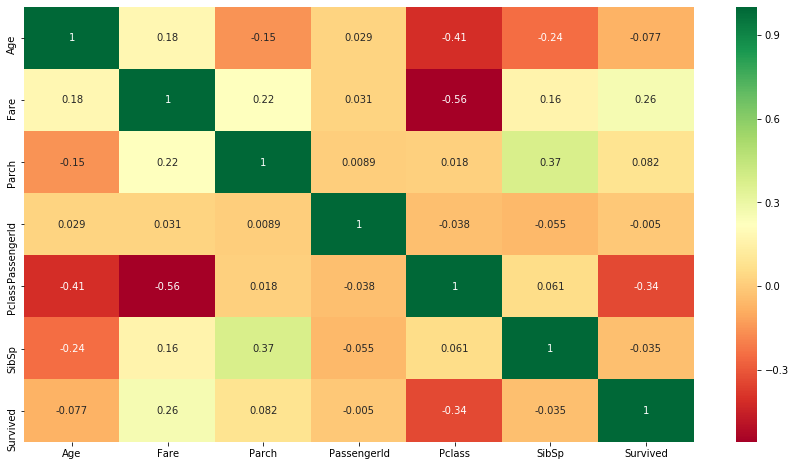

In [11]:
corrmat = titanic.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,8))
#plot heat map
g=sns.heatmap(titanic[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Check the disturbation of data

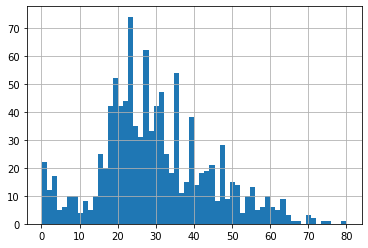

In [12]:
titanic['Age'].hist(bins=60) ## normally disturbuted

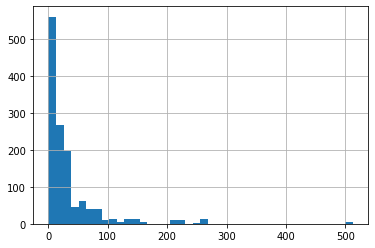

In [13]:
titanic['Fare'].hist(bins=40) ## right skewed

## Handle Outlier

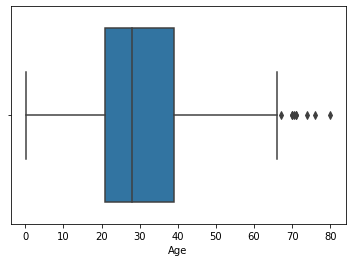

In [14]:
sns.boxplot(titanic['Age'])

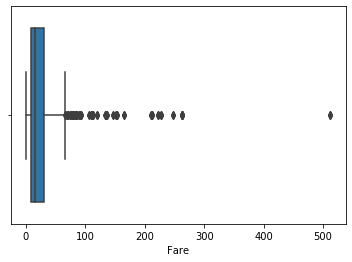

In [15]:
sns.boxplot(titanic['Fare'])

## Age is quite Gaussian and Fare is skewed, so I will use the Gaussian(normal distribution) assumption for Age, and the interquantile range for Fare

In [16]:
# Age
Upper_boundary = titanic.Age.mean() + 3* titanic.Age.std()
Lower_boundary = titanic.Age.mean() - 3* titanic.Age.std()
# Fare
IQR = titanic.Fare.quantile(0.75) - titanic.Fare.quantile(0.25)
Lower_fence = titanic.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = titanic.Fare.quantile(0.75) + (IQR * 3)

In [17]:
print('value of age',Upper_boundary , Lower_boundary)
print('value of fare',Upper_fence , Lower_fence )

value of age 73.12161730111802 -13.35934196650999
value of fare 101.4126 -62.24179999999999


## to Check the duplicated value and handle it

In [18]:
titanic.duplicated().sum()

0

## Check the null value and handle it

In [19]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
titanic.groupby('SibSp').Age.mean()

SibSp
0   30.92
1   31.06
2   23.57
3   16.31
4    8.77
5   10.17
8   14.50
Name: Age, dtype: float64

In [21]:
titanic['Age']=np.where((titanic['SibSp']==0)& (titanic['Age'].isnull()),30.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==1)& (titanic['Age'].isnull()),31.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==2)& (titanic['Age'].isnull()),23.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==3)& (titanic['Age'].isnull()),16.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==4)& (titanic['Age'].isnull()),9.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==5)& (titanic['Age'].isnull()),10.0,titanic['Age'])
titanic['Age']=np.where((titanic['SibSp']==8)& (titanic['Age'].isnull()),15.0,titanic['Age'])

In [22]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0]) 

In [23]:
titanic['Cabin']= titanic.Cabin.str.split('',expand=True)[1] # to etract the value which is related to data

In [24]:
titanic.Cabin

train  0      NaN
       1        C
       2      NaN
       3        C
       4      NaN
             ... 
test   413    NaN
       414      C
       415    NaN
       416    NaN
       417    NaN
Name: Cabin, Length: 1309, dtype: object

In [25]:
titanic.Cabin.fillna(method='ffill',inplace=True)

In [26]:
titanic.isnull().sum()

Age              0
Cabin            1
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

## Create a new columns with reference existing columns

In [27]:
titanic['Alone'] =  titanic.Parch + titanic.SibSp

In [28]:
titanic['Alone'].loc[titanic['Alone'] >0] = 'With Family'
titanic['Alone'].loc[titanic['Alone'] == 0] = 'Alone'

In [29]:
titanic[['First','Last']] =titanic.Name.str.split(',',expand=True) 

In [30]:
titanic['Title']=titanic.Last.str.split('.',expand=True)[0]

In [31]:
titanic.Title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Dr                8
 Rev               8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Dona              1
 Sir               1
 Capt              1
 Jonkheer          1
 the Countess      1
 Don               1
 Lady              1
 Mme               1
Name: Title, dtype: int64

In [32]:
titanic['Title'] = titanic['Title'].replace(to_replace=['Dr','Rev','Mile','Col','Major','Lady','Jonkheer','Ms','Mlle','the Countess','Don','Mme','Capt','Sir'],value='Other',regex=True)

In [33]:
titanic['Person']=pd.cut(titanic['Age'], bins=[0,9,18,30,50,99], labels=['Child','Student','Young adult','Adult','Old'])

In [34]:
titanic['Fare_new']=pd.cut(titanic['Fare'], bins=[-1,120,250,380,520], labels=['Low','Medium','Average','High'])

In [35]:
titanic.drop(['First','Last','Ticket','Name','PassengerId','Age','Fare'],1,inplace=True)

In [36]:
titanic.head()

Cabin Embarked  Parch  Pclass     Sex  SibSp  Survived        Alone  \
train 0   NaN        S      0       3    male      1      0.00  With Family   
      1     C        C      0       1  female      1      1.00  With Family   
      2     C        S      0       3  female      0      1.00        Alone   
      3     C        S      0       1  female      1      1.00  With Family   
      4     C        S      0       3    male      0      0.00        Alone   

         Title       Person Fare_new  
train 0     Mr  Young adult      Low  
      1    Mrs        Adult      Low  
      2   Miss  Young adult      Low  
      3    Mrs        Adult      Low  
      4     Mr        Adult      Low

In [37]:
titanic.isnull().sum()

Cabin         1
Embarked      0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
Alone         0
Title         0
Person        0
Fare_new      1
dtype: int64

In [38]:
titanic.Cabin.fillna('C',inplace=True)
titanic.Fare_new.fillna('Low',inplace=True)

In [39]:
titanic.shape

(1309, 11)

## Data Visualization (who survived or not)

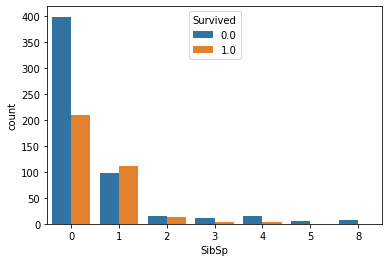

In [40]:
sns.countplot('SibSp',data=titanic, hue='Survived');

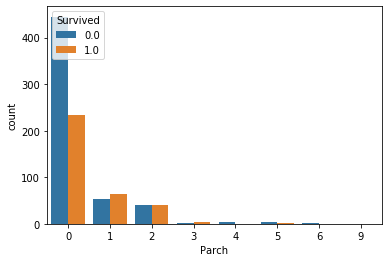

In [41]:
sns.countplot('Parch',data=titanic, hue='Survived');

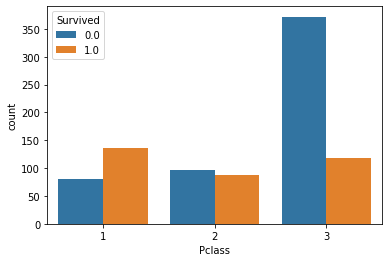

In [42]:
sns.countplot('Pclass',data=titanic, hue='Survived');

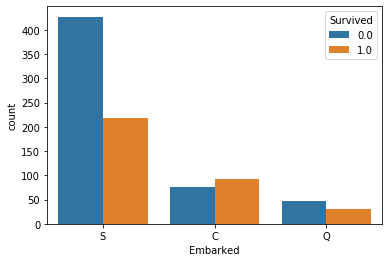

In [43]:
sns.countplot('Embarked',data=titanic, hue='Survived');

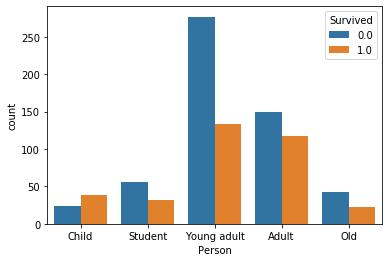

In [44]:
sns.countplot('Person',data=titanic, hue='Survived');

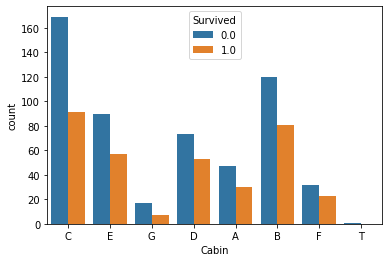

In [45]:
sns.countplot('Cabin',data=titanic, hue='Survived');

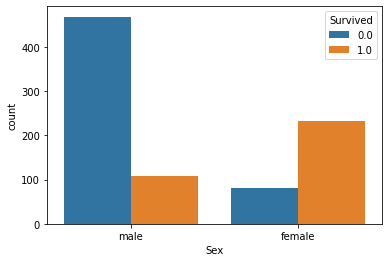

In [46]:
sns.countplot('Sex',data=titanic, hue='Survived');

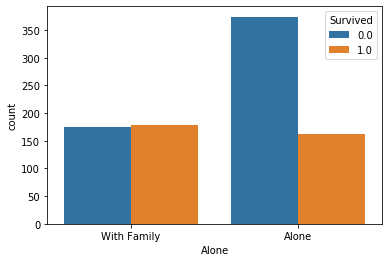

In [47]:
sns.countplot('Alone',data=titanic, hue='Survived');

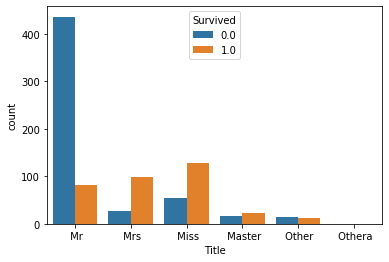

In [48]:
sns.countplot('Title',data=titanic, hue='Survived');

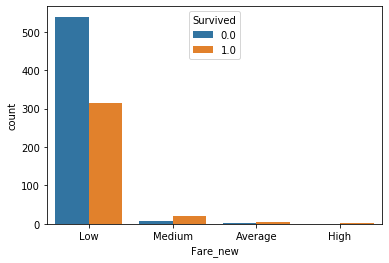

In [49]:
sns.countplot('Fare_new',data=titanic, hue='Survived');

## Model (logistic Regression)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [51]:
titanic.head()

Cabin Embarked  Parch  Pclass     Sex  SibSp  Survived        Alone  \
train 0     C        S      0       3    male      1      0.00  With Family   
      1     C        C      0       1  female      1      1.00  With Family   
      2     C        S      0       3  female      0      1.00        Alone   
      3     C        S      0       1  female      1      1.00  With Family   
      4     C        S      0       3    male      0      0.00        Alone   

         Title       Person Fare_new  
train 0     Mr  Young adult      Low  
      1    Mrs        Adult      Low  
      2   Miss  Young adult      Low  
      3    Mrs        Adult      Low  
      4     Mr        Adult      Low

In [52]:
df_num = titanic[titanic.select_dtypes(include = np.number).columns]
df_cat = titanic[titanic.select_dtypes(include = 'object').columns]

In [53]:
df_dummy = pd.get_dummies(df_cat,drop_first=True)

In [54]:
df = pd.concat([df_num,df_dummy],1)
df

Parch  Pclass  SibSp  Survived  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
train 0        0       3      1      0.00        0        1        0        0   
      1        0       1      1      1.00        0        1        0        0   
      2        0       3      0      1.00        0        1        0        0   
      3        0       1      1      1.00        0        1        0        0   
      4        0       3      0      0.00        0        1        0        0   
...          ...     ...    ...       ...      ...      ...      ...      ...   
test  413      0       3      0       nan        0        1        0        0   
      414      0       1      0       nan        0        1        0        0   
      415      0       3      0       nan        0        1        0        0   
      416      0       3      0       nan        0        1        0        0   
      417      1       3      1       nan        0        1        0        0   

           Cabin_F  Cabin_G  Cabin_T  Embarked_Q  Embarked_S  Sex_male  \
train 0          0        0        0           0           1         1   
      1          0        0        0           0           0         0   
      2          0        0        0           0           1         0   
      3          0        0        0           0           1         0   
      4          0        0        0           0           1         1   
...            ...      ...      ...         ...         ...       ...   
test  413        0        0        0           0           1         1   
      414        0        0        0           0           0         0   
      415        0        0        0           0           1         1   
      416        0        0        0           0           1         1   
      417        0        0        0           0           0         1   

           Alone_With Family  Title_ Miss  Title_ Mr  Title_ Mrs  \
train 0                    1            0          1           0   
      1                    1            0          0           1   
      2                    0            1          0           0   
      3                    1            0          0           1   
      4                    0            0          1           0   
...                      ...          ...        ...         ...   
test  413                  0            0          1           0   
      414                  0            0          0           0   
      415                  0            0          1           0   
      416                  0            0          1           0   
      417                  1            0          0           0   

           Title_ Other  Title_ Othera  
train 0               0              0  
      1               0              0  
      2               0              0  
      3               0              0  
      4               0              0  
...                 ...            ...  
test  413             0              0  
      414             0              1  
      415             0              0  
      416             0              0  
      417             0              0  

[1309 rows x 20 columns]

In [55]:
df.columns

Index(['Parch', 'Pclass', 'SibSp', 'Survived', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'Alone_With Family', 'Title_ Miss', 'Title_ Mr',
       'Title_ Mrs', 'Title_ Other', 'Title_ Othera'],
      dtype='object')

In [56]:
data = df.loc[pd.IndexSlice[['train'],::]]

In [57]:
data

Parch  Pclass  SibSp  Survived  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
train 0        0       3      1      0.00        0        1        0        0   
      1        0       1      1      1.00        0        1        0        0   
      2        0       3      0      1.00        0        1        0        0   
      3        0       1      1      1.00        0        1        0        0   
      4        0       3      0      0.00        0        1        0        0   
...          ...     ...    ...       ...      ...      ...      ...      ...   
      886      0       2      0      0.00        0        1        0        0   
      887      0       1      0      1.00        1        0        0        0   
      888      2       3      1      0.00        1        0        0        0   
      889      0       1      0      1.00        0        1        0        0   
      890      0       3      0      0.00        0        1        0        0   

           Cabin_F  Cabin_G  Cabin_T  Embarked_Q  Embarked_S  Sex_male  \
train 0          0        0        0           0           1         1   
      1          0        0        0           0           0         0   
      2          0        0        0           0           1         0   
      3          0        0        0           0           1         0   
      4          0        0        0           0           1         1   
...            ...      ...      ...         ...         ...       ...   
      886        0        0        0           0           1         1   
      887        0        0        0           0           1         0   
      888        0        0        0           0           1         0   
      889        0        0        0           0           0         1   
      890        0        0        0           1           0         1   

           Alone_With Family  Title_ Miss  Title_ Mr  Title_ Mrs  \
train 0                    1            0          1           0   
      1                    1            0          0           1   
      2                    0            1          0           0   
      3                    1            0          0           1   
      4                    0            0          1           0   
...                      ...          ...        ...         ...   
      886                  0            0          0           0   
      887                  0            1          0           0   
      888                  1            1          0           0   
      889                  0            0          1           0   
      890                  0            0          1           0   

           Title_ Other  Title_ Othera  
train 0               0              0  
      1               0              0  
      2               0              0  
      3               0              0  
      4               0              0  
...                 ...            ...  
      886             1              0  
      887             0              0  
      888             0              0  
      889             0              0  
      890             0              0  

[891 rows x 20 columns]

In [58]:
x_train =data.drop('Survived',1)

In [59]:
x_train

Parch  Pclass  SibSp  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
train 0        0       3      1        0        1        0        0        0   
      1        0       1      1        0        1        0        0        0   
      2        0       3      0        0        1        0        0        0   
      3        0       1      1        0        1        0        0        0   
      4        0       3      0        0        1        0        0        0   
...          ...     ...    ...      ...      ...      ...      ...      ...   
      886      0       2      0        0        1        0        0        0   
      887      0       1      0        1        0        0        0        0   
      888      2       3      1        1        0        0        0        0   
      889      0       1      0        0        1        0        0        0   
      890      0       3      0        0        1        0        0        0   

           Cabin_G  Cabin_T  Embarked_Q  Embarked_S  Sex_male  \
train 0          0        0           0           1         1   
      1          0        0           0           0         0   
      2          0        0           0           1         0   
      3          0        0           0           1         0   
      4          0        0           0           1         1   
...            ...      ...         ...         ...       ...   
      886        0        0           0           1         1   
      887        0        0           0           1         0   
      888        0        0           0           1         0   
      889        0        0           0           0         1   
      890        0        0           1           0         1   

           Alone_With Family  Title_ Miss  Title_ Mr  Title_ Mrs  \
train 0                    1            0          1           0   
      1                    1            0          0           1   
      2                    0            1          0           0   
      3                    1            0          0           1   
      4                    0            0          1           0   
...                      ...          ...        ...         ...   
      886                  0            0          0           0   
      887                  0            1          0           0   
      888                  1            1          0           0   
      889                  0            0          1           0   
      890                  0            0          1           0   

           Title_ Other  Title_ Othera  
train 0               0              0  
      1               0              0  
      2               0              0  
      3               0              0  
      4               0              0  
...                 ...            ...  
      886             1              0  
      887             0              0  
      888             0              0  
      889             0              0  
      890             0              0  

[891 rows x 19 columns]

In [60]:
y_train = data.Survived

In [61]:
y_train

train  0     0.00
       1     1.00
       2     1.00
       3     1.00
       4     0.00
             ... 
       886   0.00
       887   1.00
       888   0.00
       889   1.00
       890   0.00
Name: Survived, Length: 891, dtype: float64

In [62]:
data1 = df.loc[pd.IndexSlice[['test'],::]]

In [63]:
x_test = data1.drop('Survived',1)

In [64]:
x_test

Parch  Pclass  SibSp  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
test 0        0       3      0        0        1        0        0        0   
     1        0       3      1        0        1        0        0        0   
     2        0       2      0        0        1        0        0        0   
     3        0       3      0        0        1        0        0        0   
     4        1       3      1        0        1        0        0        0   
...         ...     ...    ...      ...      ...      ...      ...      ...   
     413      0       3      0        0        1        0        0        0   
     414      0       1      0        0        1        0        0        0   
     415      0       3      0        0        1        0        0        0   
     416      0       3      0        0        1        0        0        0   
     417      1       3      1        0        1        0        0        0   

          Cabin_G  Cabin_T  Embarked_Q  Embarked_S  Sex_male  \
test 0          0        0           1           0         1   
     1          0        0           0           1         0   
     2          0        0           1           0         1   
     3          0        0           0           1         1   
     4          0        0           0           1         0   
...           ...      ...         ...         ...       ...   
     413        0        0           0           1         1   
     414        0        0           0           0         0   
     415        0        0           0           1         1   
     416        0        0           0           1         1   
     417        0        0           0           0         1   

          Alone_With Family  Title_ Miss  Title_ Mr  Title_ Mrs  Title_ Other  \
test 0                    0            0          1           0             0   
     1                    1            0          0           1             0   
     2                    0            0          1           0             0   
     3                    0            0          1           0             0   
     4                    1            0          0           1             0   
...                     ...          ...        ...         ...           ...   
     413                  0            0          1           0             0   
     414                  0            0          0           0             0   
     415                  0            0          1           0             0   
     416                  0            0          1           0             0   
     417                  1            0          0           0             0   

          Title_ Othera  
test 0                0  
     1                0  
     2                0  
     3                0  
     4                0  
...                 ...  
     413              0  
     414              1  
     415              0  
     416              0  
     417              0  

[418 rows x 19 columns]

In [67]:
model = LogisticRegression() 

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,{'C':[.001,0.1,0.01,10,0.9]})
grid.fit(x_train,y_train)
grid.best_params_ 

{'C': 10}

In [69]:
model = LogisticRegression(C=10) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [70]:
prediction = pd.read_csv('gender_submission.csv')

In [71]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
prediction=pd.read_csv('gender_submission.csv')
datasets=pd.concat([prediction['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submissions.csv',index=False)